# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
# import os
import keras

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, neuron_num=[1024, 1024, 512, 512, 256 ,256], output_units=10 ):
  """
  Build your own model
  """
  input_layer = keras.layers.Input(input_shape)
  for i, num in enumerate(neuron_num):
    if i == 0:
      x = keras.layers.Dense(units=num, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
    else:
      x = keras.layers.Dense(units=num, activation="relu", name="hidden_layer"+str(i+1))(x)
  
  out = keras.layers.Dense(units=output_units, activation='softmax', name='output_layer')(x)
  model = keras.models.Model(inputs=input_layer, outputs=out)

  return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-3, 5e-4, 1e-4]
OPTIMIZERS = [keras.optimizers.SGD,
        keras.optimizers.RMSprop,
        keras.optimizers.Adagrad,
        keras.optimizers.Adam] 

EPOCHS = 30
BATCH_SIZE = 256


In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
  for i, opt in enumerate(OPTIMIZERS):
    Opt_name = {0:'SGD', 1:'RMS', 2:'Adagrad', 3:'Adam'}
    keras.backend.clear_session()
    print(f'EXPERIMENT: Lr={lr}, Opt={Opt_name[i]}')
    model = build_mlp(input_shape=x_train.shape[1:])
    optimizer = OPTIMIZERS[i](lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.summary()
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = f'Lr={lr}, Opt={Opt_name[i]}'
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

EXPERIMENT: Lr=0.001, Opt=SGD
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 1024)              1049600   
_________________________________________________________________
hidden_layer3 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 512)               262656    
_________________________________________________________________
hidden_layer5 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer6 (Dense)        (N

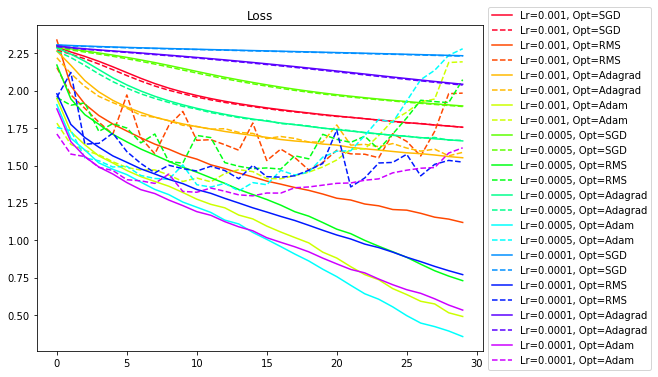

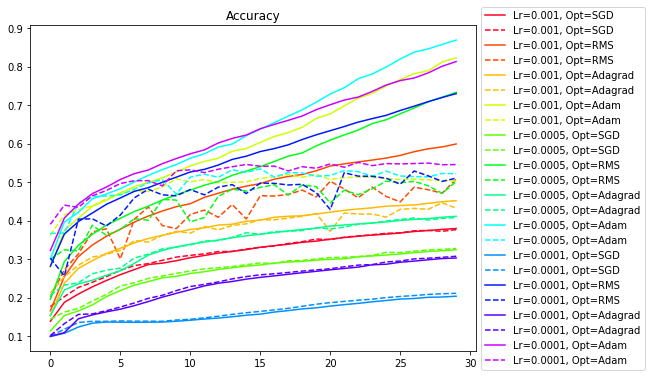

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]


plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()